In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

In [38]:
data = np.loadtxt('DecayTimesData.txt')
#data = np.load('cm_results.npy')
data.shape

(10000,)

In [39]:
np.mean(data)

0.47684853477344641

0.069427489039373819

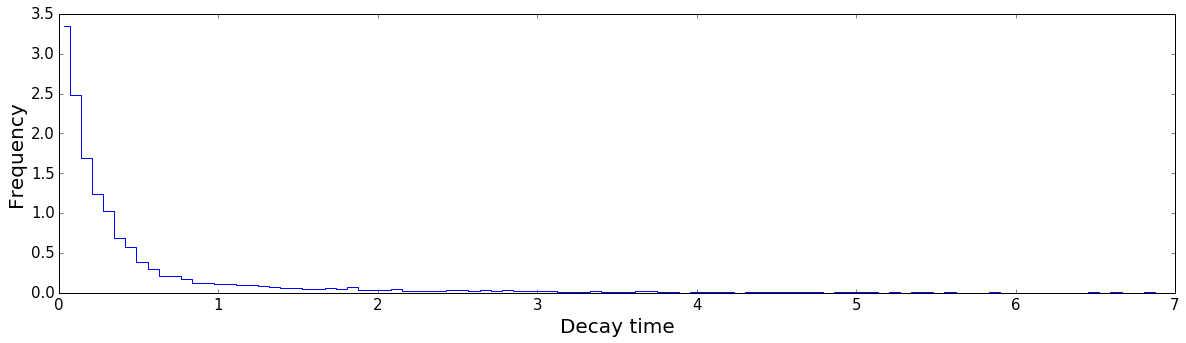

In [59]:
f,bins = np.histogram(data,bins=100,normed=True)
step = bins[1]-bins[0]
plt.figure(figsize=(20,5))
plt.plot(bins[1:]-step/2,f,drawstyle='steps-mid')
tau = 0.3
#plt.plot([x for x in np.arange(0,7,0.1)],[(1/tau)*np.exp(-x/tau) for x in np.arange(0,7,0.1)],'--')
plt.xlabel('Decay time',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
step

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 8 Text xticklabel objects>)

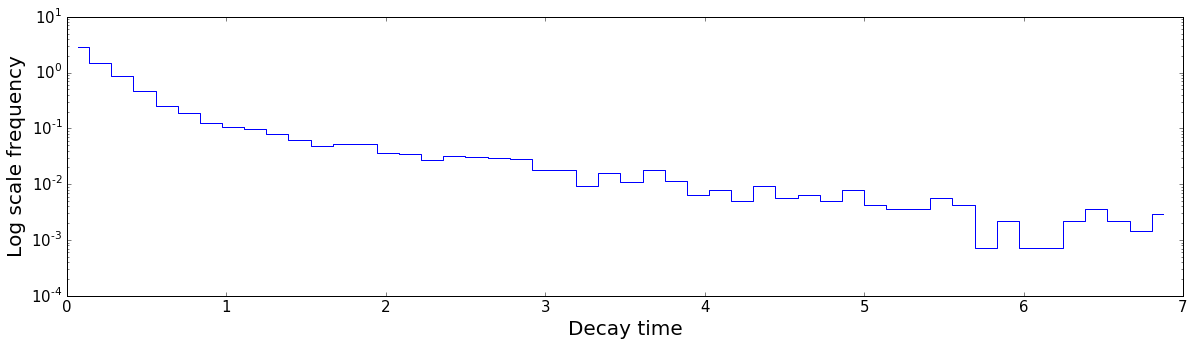

In [41]:
f,bins = np.histogram(data,bins=50,normed=True)
step = bins[1]-bins[0]
plt.figure(figsize=(20,5))
plt.plot(bins[:-1]+step/2,f,drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('Decay time',fontsize=20)
plt.ylabel('Log scale frequency',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [42]:
def pdf(theta,t):
    f,tau1,tau2 = theta
    return f*(1/tau1)*np.exp(-t/tau1)+(1-f)*(1/tau2)*np.exp(-t/tau2)

In [43]:
def nll(theta,t):
    f,tau1,tau2 = theta
    return -np.sum(np.log(f*(1/tau1)*np.exp(-t/tau1)+(1-f)*(1/tau2)*np.exp(-t/tau2)))  

In [44]:
start = time.time()
result = optimize.minimize(nll, [ 0.74849482,  0.19783713,  1.30720412], args=(data),method='Nelder-Mead')
print(result)
time.time()-start

 final_simplex: (array([[ 0.74849482,  0.19783713,  1.30720412],
       [ 0.74849624,  0.19783055,  1.30721464],
       [ 0.7484941 ,  0.19783655,  1.30712747],
       [ 0.7485167 ,  0.19783941,  1.30723005]]), array([ 885.0713366 ,  885.07133929,  885.07133961,  885.07134091]))
           fun: 885.07133659655426
       message: 'Optimization terminated successfully.'
          nfev: 84
           nit: 50
        status: 0
       success: True
             x: array([ 0.74849482,  0.19783713,  1.30720412])


0.1460888385772705

In [45]:
start = time.time()
result = optimize.minimize(nll, [ 0.74849482,  0.19783713,  1.30720412], args=(data),method='TNC')
print(result)
time.time()-start

     fun: 885.07133658680982
     jac: array([ 0.00713953, -0.01145963,  0.00449063])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 3
     nit: 1
  status: 1
 success: True
       x: array([ 0.74849409,  0.1978367 ,  1.30720393])


0.035529375076293945

In [46]:
counter = 0
for params in [[p1,p2,p3] for p1 in np.arange(0,1,0.1) for p2 in np.arange(0,5,0.1) for p3 in np.arange(0,5,0.1)]:
    result = optimize.minimize(nll, [params], args=(data),method='TNC')
    counter += 1
    if result['success'] == True:
        print(params)
        break

[0.0, 0.10000000000000001, 1.2000000000000002]


In [47]:
print(result)
counter

     fun: 885.07133659644785
     jac: array([ 0.0146656 ,  0.01834906,  0.00223963])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 70
     nit: 16
  status: 1
 success: True
       x: array([ 0.74849482,  0.19783713,  1.30720412])


63

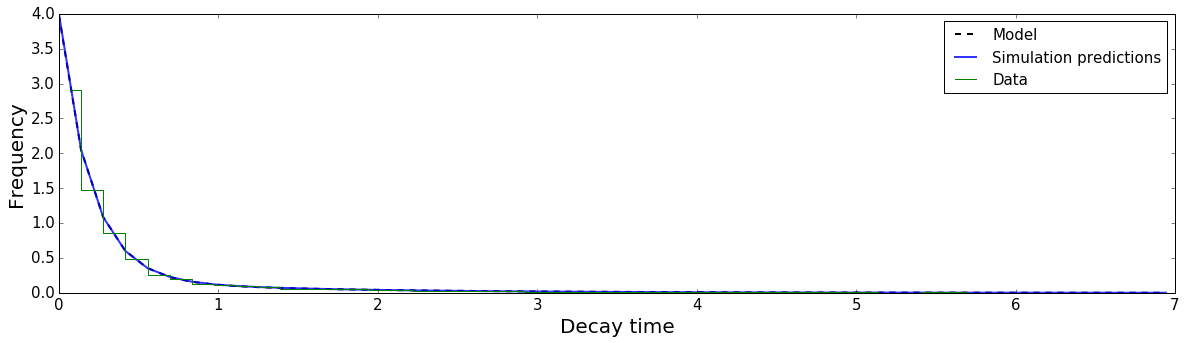

In [58]:
step = bins[1]-bins[0]
plt.figure(figsize=(20,5))
plt.plot([t for t in np.arange(0,7,step)],[pdf(result['x'],t) for t in np.arange(0,7,step)],'k--',lw=2.,label='Model')
plt.plot([t for t in np.arange(0,7,step)],[pdf([0.74196680177097762, 0.19573056079584727, 1.2487647208915842],t) for t in np.arange(0,7,step)],
         lw=2.,alpha=0.8,label ='Simulation predictions')

#plt.plot([t for t in np.arange(0,7,step)],[pdf([0.2,1.31,0.25],t) for t in np.arange(0,7,step)],drawstyle='steps-mid')
#plt.yscale('log')
#plt.figure(figsize=(20,10))
plt.plot(bins[1:]-step/2,f,drawstyle='steps-mid',label='Data')
#plt.yscale('log')
nll(result['x'],data),nll([0.2,1.31,0.25],data)
plt.xlabel('Decay time',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)

In [12]:
result

     fun: 608.29323215642376
     jac: array([-0.06334631,  0.0293312 ,  0.01850822])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 69
     nit: 14
  status: 1
 success: True
       x: array([ 0.76546345,  0.20308948,  1.29527494])

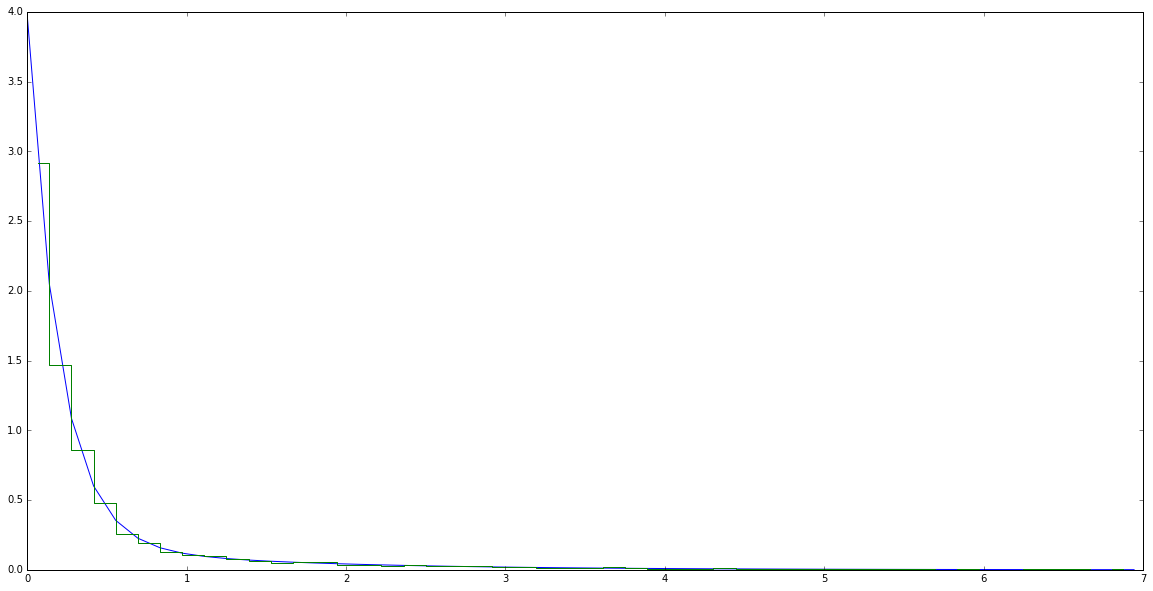

In [36]:
step = bins[1]-bins[0]
plt.figure(figsize=(20,10))
plt.plot([t for t in np.arange(0,7,step)],[pdf(result['x'],t) for t in np.arange(0,7,step)])
plt.plot(bins[1:]-step/2,f,drawstyle='steps-mid')

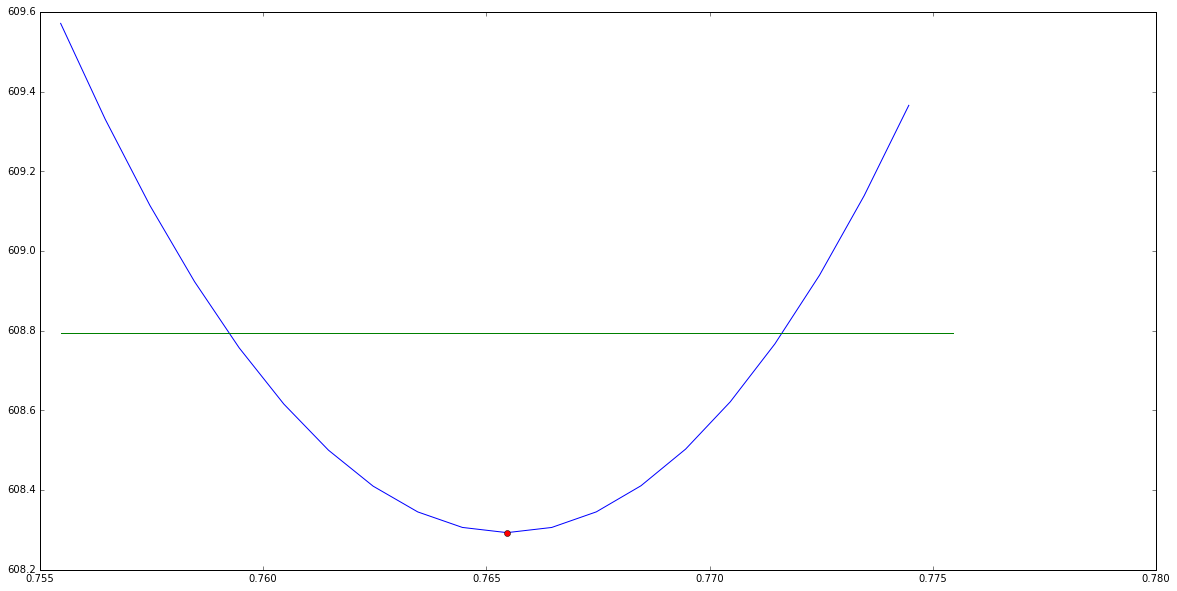

In [16]:
params = result['x']
plt.figure(figsize=(20,10))
bounds = [-0.01,0.01]
plt.plot([params[0]+dx for dx in np.arange(bounds[0],bounds[1],0.001)],
         [nll([params[0]+dx,params[1],params[2]],data) for dx in np.arange(bounds[0],bounds[1],0.001)])
plt.plot([params[0]+bounds[0],params[0]+bounds[1]],[nll(params,data)+0.5,nll(params,data)+0.5])
plt.plot([params[0]],[result['fun']],'ro')

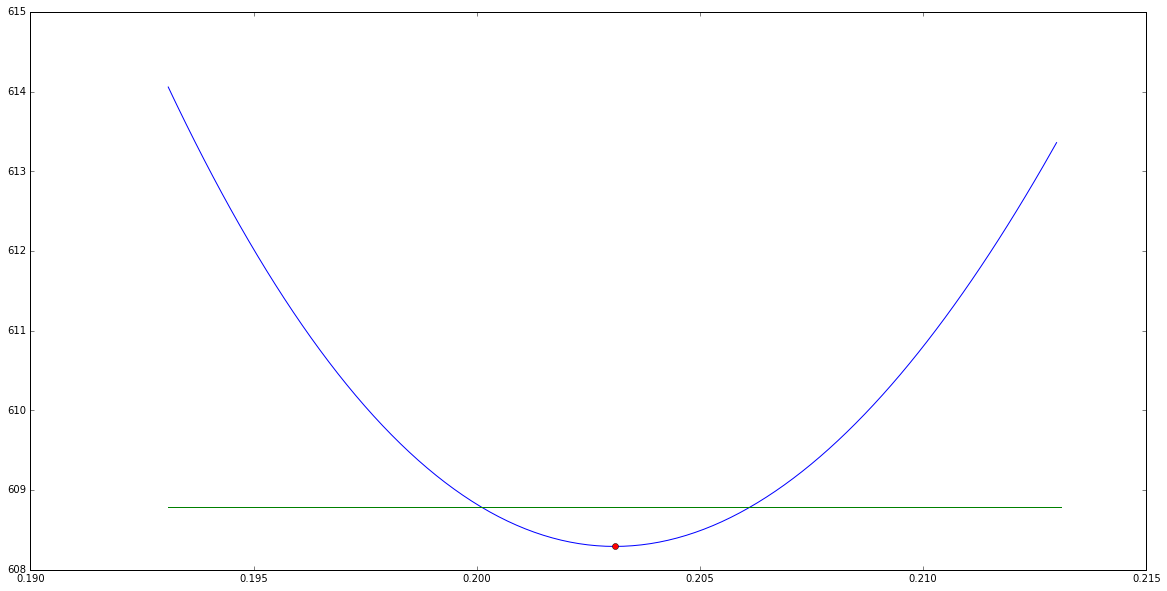

In [17]:
params = result['x']
plt.figure(figsize=(20,10))
bounds = [-0.01,0.01,0.0001]
plt.plot([params[1]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
         [nll([params[0],params[1]+dx,params[2]],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
plt.plot([params[1]+bounds[0],params[1]+bounds[1]],[nll(params,data)+0.5,nll(params,data)+0.5])
plt.plot([params[1]],[result['fun']],'ro')

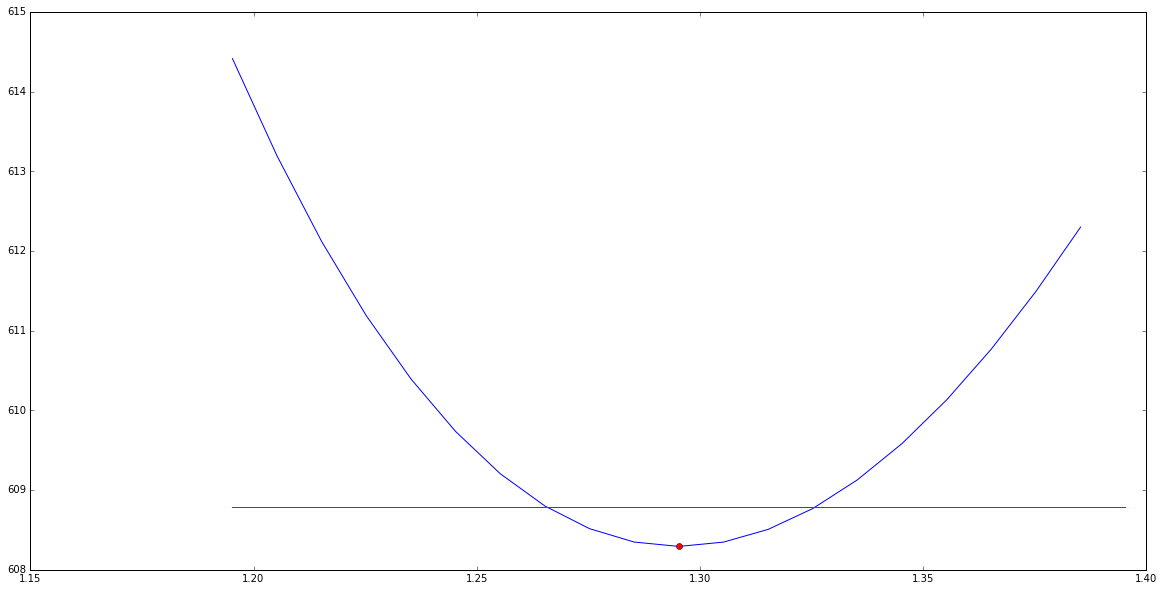

In [18]:
params = result['x']
plt.figure(figsize=(20,10))
bounds = [-0.1,0.1,0.01]
plt.plot([params[2]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
         [nll([params[0],params[1],params[2]+dx],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
plt.plot([params[2]+bounds[0],params[2]+bounds[1]],[nll(params,data)+0.5,nll(params,data)+0.5])
plt.plot([params[2]],[result['fun']],'ro')

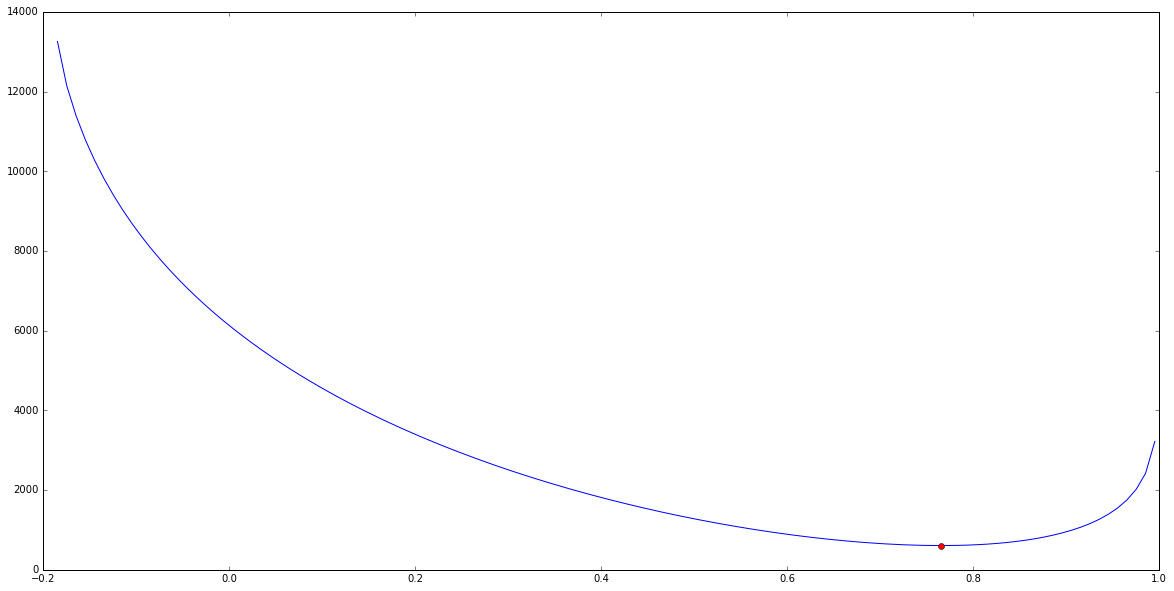

In [19]:
params = result['x']
plt.figure(figsize=(20,10))
bounds = [-2,2]
plt.plot([params[0]+dx for dx in np.arange(bounds[0],bounds[1],0.01)],
         [nll([params[0]+dx,params[1],params[2]],data) for dx in np.arange(bounds[0],bounds[1],0.01)])
plt.plot([params[0]],[result['fun']],'ro')

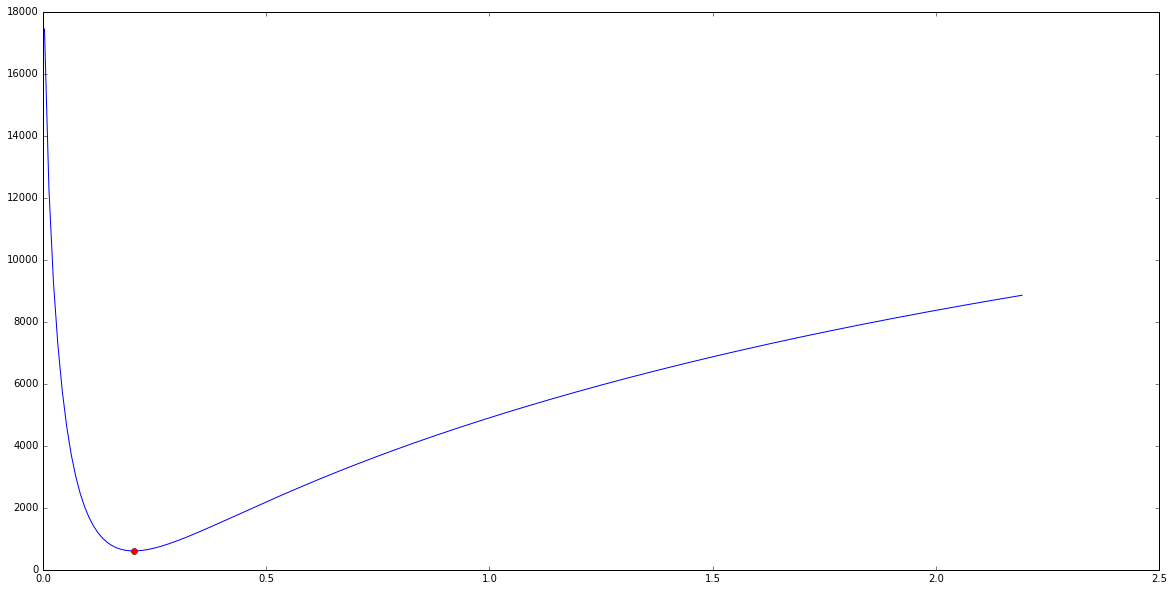

In [20]:
params = result['x']
plt.figure(figsize=(20,10))
bounds = [-2,2,0.01]
plt.plot([params[1]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
         [nll([params[0],params[1]+dx,params[2]],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
plt.plot([params[1]],[result['fun']],'ro')

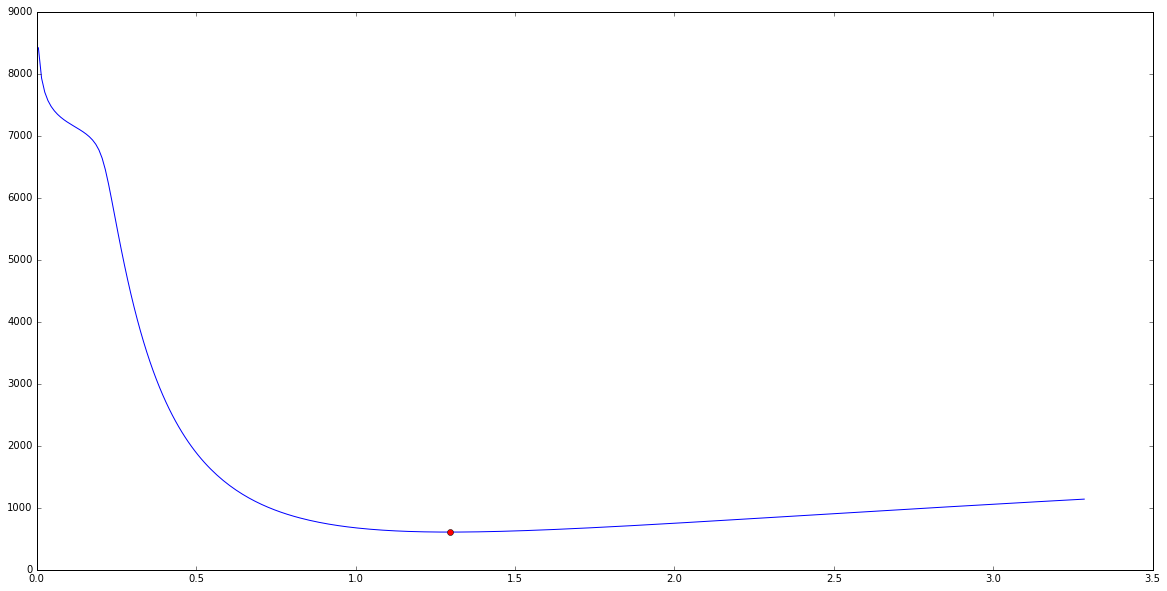

In [21]:
params = result['x']
plt.figure(figsize=(20,10))
bounds = [-2,2,0.01]
plt.plot([params[2]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
         [nll([params[0],params[1],params[2]+dx],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
plt.plot([params[2]],[result['fun']],'ro')

In [209]:
# could now try a contour plot to look at these in more detail

In [210]:
np.mean(data)

0.47684853477344641